In [119]:
# https://www.kaggle.com/ternaryrealm/lstm-time-series-explorations-with-keras
# https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/
    
import sys
import math

# !{sys.executable} -m pip install --upgrade pip

try:
    import numpy as np
except ModuleNotFoundError:
    !{sys.executable} -m pip install numpy
    import numpy as np
    

try:
    import pandas as pd
except ModuleNotFoundError:
    !{sys.executable} -m pip install pandas
    import pandas as pd

    
try:
    import matplotlib
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt

    
try:
    import psycopg2
except ModuleNotFoundError:
    !{sys.executable} -m pip install psycopg2
    import psycopg2
    
    
try:
    import scipy
except ModuleNotFoundError:
    !{sys.executable} -m pip install scipy
    import scipy

        
try:
    import sklearn
except ModuleNotFoundError:
    !{sys.executable} -m pip install sklearn
    import sklearn

    
try:
    import statsmodels
except ModuleNotFoundError:
    !{sys.executable} -m pip install statsmodels
    import statsmodels


try:
    import theano
except ModuleNotFoundError:
    !{sys.executable} -m pip install theano
    import theano


try:
    import tensorflow
except ModuleNotFoundError:
    !{sys.executable} -m pip install tensorflow
    import tensorflow


try:
    import keras
except ModuleNotFoundError:
    !{sys.executable} -m pip install keras
    import keras
    
try:
    import ann_visualizer
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install ann_visualizer
    import ann_visualizer
    
try:
    import graphviz
except ModuleNotFoundError:
    !{sys.executable} -m pip install graphviz
    import graphviz
    
    
from keras.models import Sequential
from keras.layers import Dense

In [120]:
"""
Make plot outputs appear and be stored within the notebook
"""
%matplotlib inline

"""
fix random seed for reproducibility
"""
np.random.seed(7)

In [121]:
from numpy import genfromtxt

def get_df():
    """
    Query the Postgres database and return the data set in a Pandas dataframe with (x,y)
    """
    
    # conn = psycopg2.connect(DATABASE_URL)
    # cur = conn.cursor()
    # cur.execute('select * from project2')
    data = genfromtxt(r"C:\Users\cccarmer\Documents\asu\EEE 511\code\proj3\data.csv")
    df = pd.DataFrame(data, columns=['y'])
    # conn.commit()
    # conn.close()
    
    return df


In [122]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM, SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.utils.vis_utils import plot_model

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

data = get_df()

# Get the raw data values from the pandas data frame.
dataset = data.values.astype("float32")

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

184 91


In [123]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [124]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [125]:
%%capture
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)


In [126]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 417.26 MSE (20.43 RMSE)
Test Score: 623.87 MSE (24.98 RMSE)


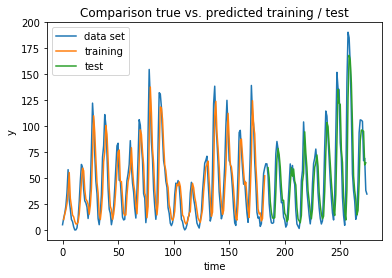

In [127]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset, label = 'data set')
plt.plot(trainPredictPlot, label = 'training')
plt.plot(testPredictPlot, label = 'test')
plt.xlabel("time")
plt.ylabel("y")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()